In [2]:
import tensorflow as tf
from tensorboard import program

log_dir = "./home/vicevil/Documentos/graficas/logs"
tb=program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch() #  lanza TensorBoard en el navegador

import tensorboard

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)




NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,f1_score,precision_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2, l1, l1_l2
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import regularizers
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
import networkx as nx
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau




# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# INTRODUCCION

Este dataset es la concatenación de 13 dataset donde se muestra datos tecnicos y concretos sobre ataques malware. La idea del presente trabajo es analizar la gran cantidad de datos para establecer un modelo de red neuronal que pueda prevenir los ataques malware idintificados como "benign o malicious" e ir alimentandolo en un futuro con nuevos datos. EL dataset, despues de las uniones y primeros tratamientos, cuenta con 19 columnas y 25.011.003 millones de registros por cada columna.

# CARGA DATASET

windows

In [4]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_unido_0_pocos_nulos.csv")

c:\Users\victo\miniconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (7,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Linux

In [9]:
df_nulos= pd.read_csv(r"/media/vicevil/Nuevo vol/Cursos/REPOSITORIOS/DATASET/malware_total/original/df_malware_unido_0_pocos_nulos.csv")

/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (7,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. TRATAMIENTO DE DATOS - EDA

In [10]:
df_nulos

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,NaN,2.999051,0.0,0.0,S0,NaN,NaN,0.0,S,3.0,180.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,NaN,NaN,NaN,NaN,S0,NaN,NaN,0.0,S,1.0,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,NaN,NaN,NaN,NaN,S0,NaN,NaN,0.0,S,1.0,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,NaN,2.998796,0.0,0.0,S0,NaN,NaN,0.0,S,3.0,180.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,NaN,NaN,NaN,NaN,S0,NaN,NaN,0.0,S,1.0,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,1.569026e+09,CyeWQ7K6jWDDbI4Kd,192.168.1.195,123.0,89.221.210.188,123.0,udp,NaN,0.004499,96.0,96.0,SF,NaN,NaN,0.0,Dd,2.0,152.0,2.0,152.0,NaN,Benign,NaN
25010999,1.568941e+09,CS9u9p3IiuKuTYfauc,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,NaN,84970.742165,8523.0,8559.0,S1,NaN,NaN,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,NaN,Malicious C&C,HeartBeat
25011000,1.569026e+09,ChLFLFZumxpFdFbV8,192.168.1.195,123.0,212.111.30.190,123.0,udp,NaN,0.007994,96.0,96.0,SF,NaN,NaN,0.0,Dd,2.0,152.0,2.0,152.0,NaN,Benign,NaN
25011001,1.569026e+09,CdOxuh15kV4eHJYKkb,192.168.1.195,123.0,5.1.56.123,123.0,udp,NaN,0.005250,96.0,96.0,SF,NaN,NaN,0.0,Dd,2.0,152.0,2.0,152.0,NaN,Benign,NaN


In [11]:
df_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        float64
 9   orig_bytes      float64
 10  resp_bytes      float64
 11  conn_state      object 
 12  local_orig      float64
 13  local_resp      float64
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  float64
 21  label           object 
 22  detailed-label  object 
dtypes: float64(14), object(9)
memory usage: 4.3+ GB


NULOS.- Gran cantidad de nulos en algunas de las columnas del Dataset

In [7]:
df.isna().sum()/len(df)*100

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.928044
duration           61.061418
orig_bytes         61.061418
resp_bytes         61.061418
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.100420
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label     71.784854
dtype: float64

Por todo ello, elimino varias columnas : **["history","service", "duration", orig_bytes","resp_bytes",local_orig", "local_resp","tunnel_parents", "detailed_label"]**, teniendo en cuenta la gran catidad de datos del Dataset.

**history**.-Aunque no tiene mucho nulos y podria imputarle la moda, los datos que lo componen son un historial de conexiones previas entre los hosts, por lo que he decidio no tenerlo en cuenta para la predicciones futuras de deteccion de malware.

In [13]:

df_nulos.drop(columns={"history","service", "duration", "orig_bytes","resp_bytes","local_orig", "local_resp","tunnel_parents", "detailed-label"}, inplace=True)

ESQUEMA DEL DATASET PREVIO

Columna: |	Descripción: |	Tipo: |	Orden de entrada: |	Información posterior a la etiqueta "label"|
-|-|-|-|-|
id.orig_h|	Identificador único del host de origen	|Categórico |	1	 |No
id.resp_h|	Identificador único del host de destino	|Categórico	 |2	 |No
proto|	Protocolo utilizado (TCP, UDP, ICMP, etc.)|	Categórico|	3|	No
conn_state|	Estado de la conexión (SYN, ACK, FIN, etc.)|	Categórico|	4	|No
orig_pkts|	Número de paquetes enviados por el host de origen|	Numérico|	5|	No
orig_ip_bytes|	Número de bytes enviados por el host de origen|	Numérico|	6|	No
resp_pkts|	Número de paquetes recibidos por el host de destino	|Numérico|	7|	No
resp_ip_bytes|	Número de bytes recibidos por el host de destino|	Numérico|	8|	No
anyo|	Año de la conexión|	Numérico|	9|	No
mes|	Mes de la conexión|	Numérico|	10|	No
dia|	Día de la conexión|	Numérico|	11|	No
hora|	Hora de la conexión|	Numérico|	12|	No
dia_semanal|	Día de la semana de la conexión	|Categórico|	13|	No
id.resp_p|	Identificador único del puerto de destino|	Categórico|	14|	No
missed_bytes|	Número de bytes perdidos en la conexión	|Numérico|	15|	No
id.orig_p|	Identificador único del puerto de origen|	Categórico|	16|	No
label|	Etiqueta que indica si la conexión es normal o anómala|	Categórica	| Target

Modifico el tiempo epoch, formato unix(1/1/1970) o timestamp en datetime

In [17]:
#convierto el horario unix a datetime
df_nulos['ts'] = pd.to_datetime(df_nulos['ts'], unit='s')


In [16]:
#separo columnas de tiempos en año, mes, dia y dia de la semaña para tener mas datos concretos y separados
df_nulos["anyo"] = df_nulos["ts"].dt.year
df_nulos["mes"] = df_nulos["ts"].dt.month
df_nulos["dia"] = df_nulos["ts"].dt.day
df_nulos["hora"] = df_nulos["ts"].dt.hour
df_nulos["dia_semanal"]= df_nulos["ts"].dt.dayofweek

In [19]:
#elimino  la columna ts
df_nulos.drop(columns={"ts"}, inplace=True)

In [21]:
df_nulos.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anyo,mes,dia,hora,dia_semanal
0,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15,2
1,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
2,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
3,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15,2
4,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2


ELIMINO EL IDENTIFICADOR UNICO Y LA COLUMNA ID.RESP_H POR LA CANTIDAD DESMESURADA DE VALORES UNICOS QUE AFECTARAN A LA GENERALIZACION DEL MODELO Y RENDIMIENTO DEL PC

In [23]:
#elimino también la columna uid que es un indentificador de alta cardinalidad 
df_nulos.drop(columns={"uid", "id.orig_h"},  inplace=True)

In [25]:
df_nulos.shape

(25011003, 16)

ANALISIS DE LA TARGET

In [27]:
df_nulos.rename(columns={"label":"target"}, inplace=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

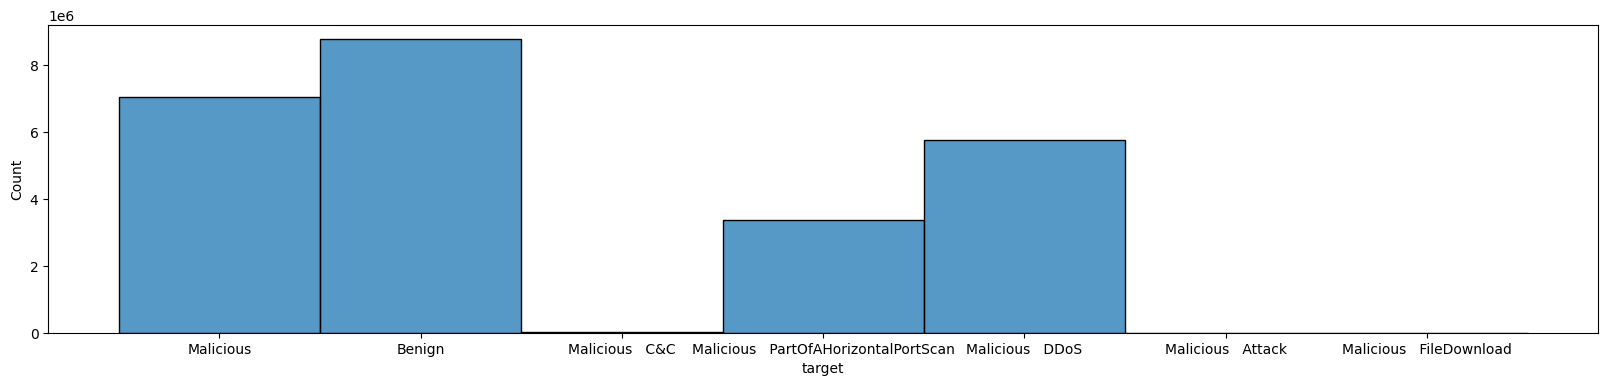

In [21]:
plt.figure(figsize=(20,4))
sns.histplot(df_nulos.target)

In [22]:
df.target.unique()

array(['Malicious', 'Benign', 'Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack', 'Malicious   FileDownload'], dtype=object)

CONVERTIMOS LOS VALORES "MALICIOUS + ALGUNA PALABRA" EN "MALICIOUS" PARA QUEDARNOS CON UNA COLUMNA BINARIA

In [28]:
def reemplazar_malicioso(valor):
  if valor in ["Malicious   C&C", "Malicious   PartOfAHorizontalPortScan",
              "Malicious   DDoS", "Malicious   Attack", "Malicious   FileDownload"]:
    return "Malicious"
  else:
    return valor
  

In [30]:
df_nulos["Target"] = df_nulos["target"].apply(reemplazar_malicioso)


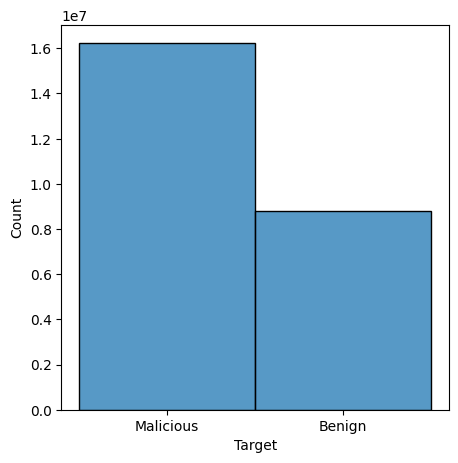

In [26]:
plt.figure(figsize=(5,5))
sns.histplot(df_nulos.Target, bins=100);

In [31]:
df_nulos.Target.value_counts()/len(df_nulos)*100

Malicious    64.894818
Benign       35.105182
Name: Target, dtype: float64

La target esta desbalanceada

In [33]:

df_nulos.drop(columns={"target"}, inplace=True)


In [37]:
bt.obtener_estadisticas(df_nulos)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_p,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
id.resp_h,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
id.resp_p,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.059998,0.0,0.0,0.0,numerica continua,0.0
orig_pkts,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
orig_ip_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0
resp_pkts,0.0,float64,0.01,No,4.19,17.55,0.0,0.0,0.0,numerica continua,0.0
resp_ip_bytes,0.01,float64,1.75,No,376.2,141523.04,0.0,0.0,0.0,numerica continua,0.0


GRAFICAMOS LAS  COLUMNAS PARA VISUALIZARLAS

In [30]:
df_nulos.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'dia_semanal', 'Target'],
      dtype='object')

In [38]:
cat= ['proto','conn_state','id.resp_h']
num=[  'missed_bytes', 'id.orig_p','id.resp_p','orig_pkts', 'orig_ip_bytes','resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora','dia_semanal']

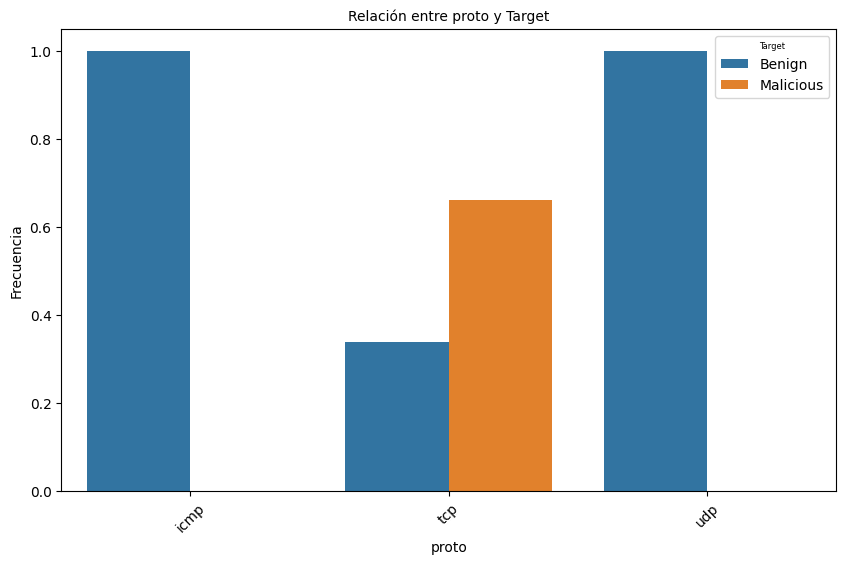

In [20]:
bt.plot_categorical_relationship_fin(df, "proto", "Target", relative_freq=True, show_values=False, size_group = 20)

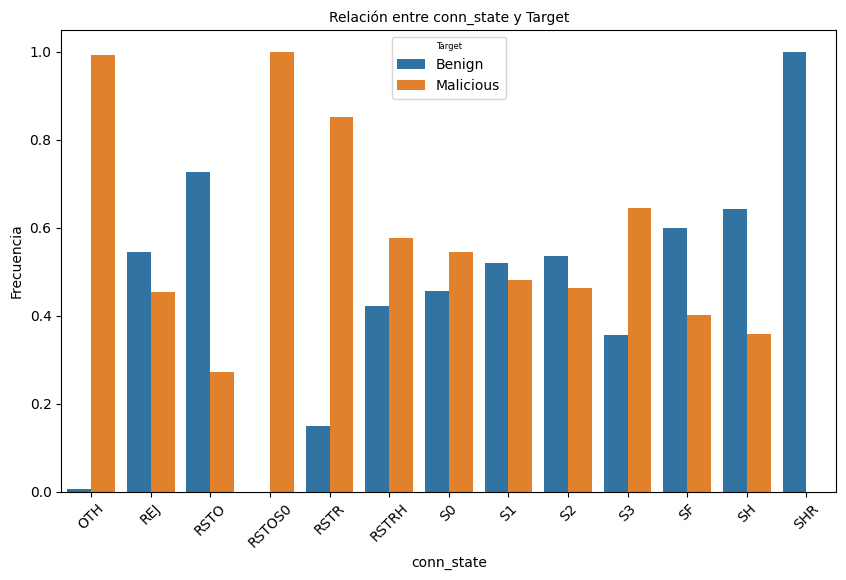

In [21]:
bt.plot_categorical_relationship_fin(df, "conn_state", "Target", relative_freq=True, show_values=False, size_group = 20)

In [33]:
#NO SE GRAFICA LA COLUMNA ID.RESP.H POR TLAS EXCESIVAS GRAFICCAS, PERO ESTA MEZCALDAS, HAY IP QUE SON ARHIVO BUENOS Y OTRAS QUE TRAEN ARCHIVOS MALICIOASOS

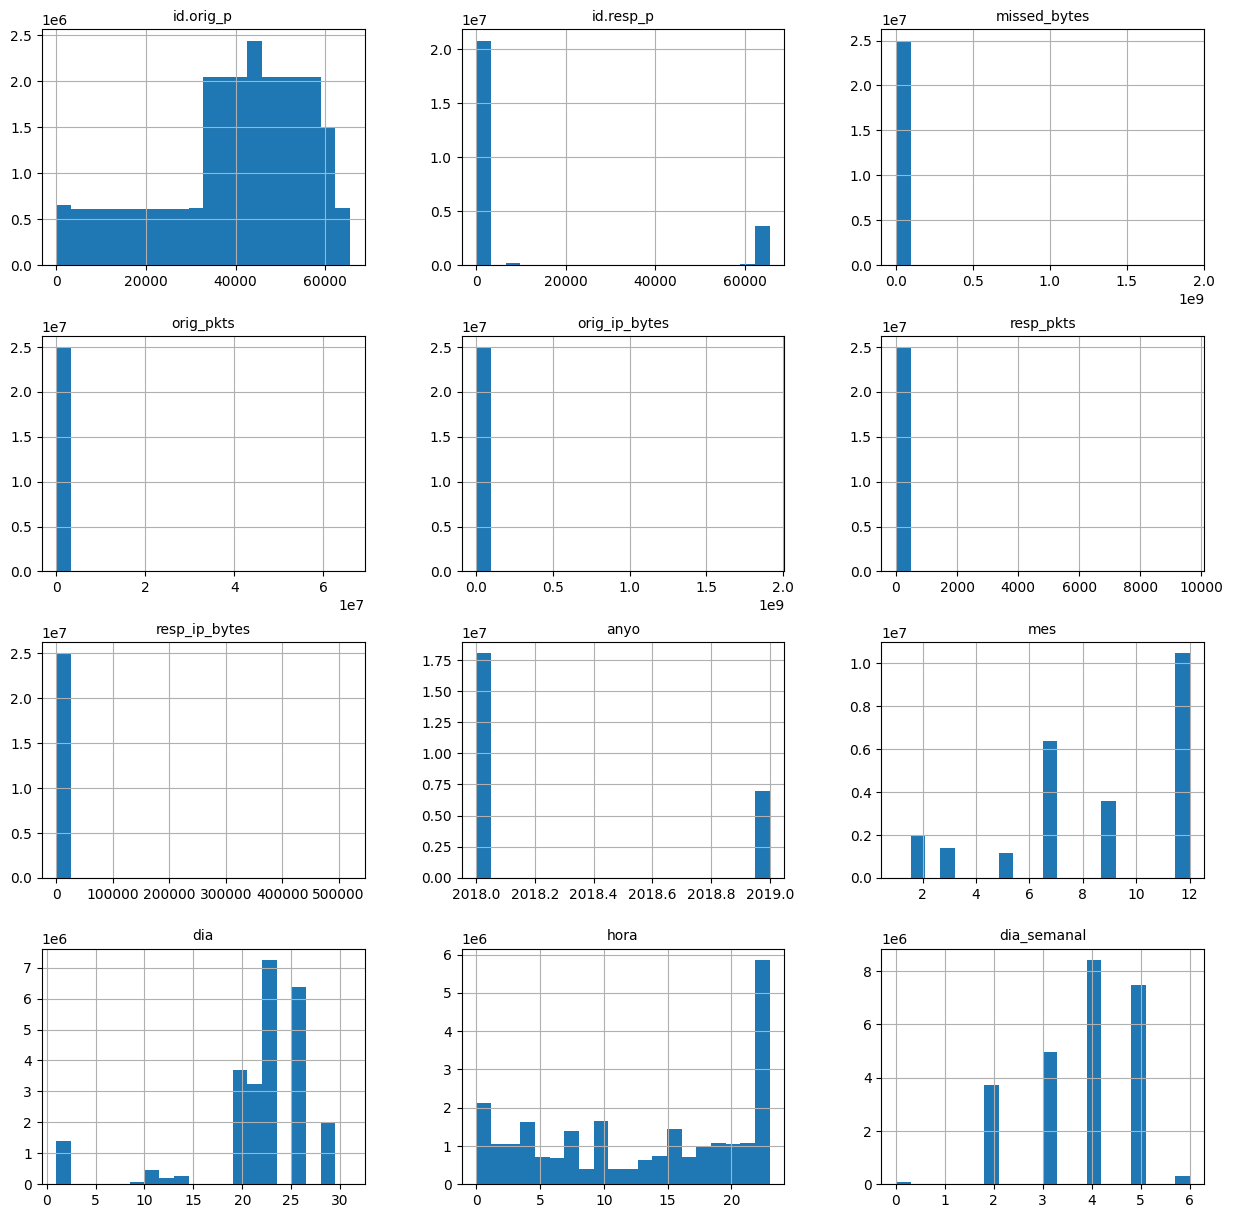

In [34]:
df.hist(figsize=(15,15), bins=20);


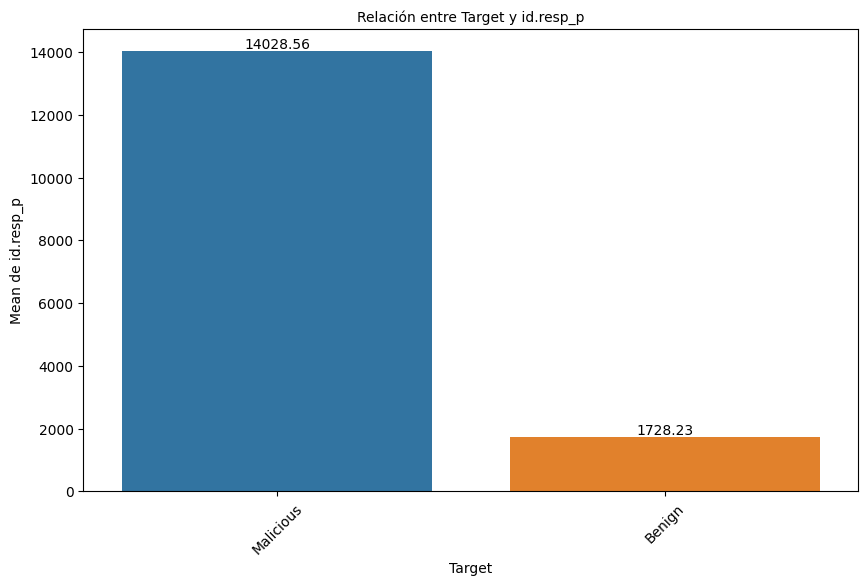

X-Content-Type-Options is required to be "nosniff"
X-Content-Type-Options is required to be "nosniff"
Requires default-src for Content-Security-Policy
X-Content-Type-Options is required to be "nosniff"


In [ ]:
bt.plot_categorical_numerical_relationship(df_nulos, "Target", "id.resp_p", show_values=True, measure='mean')

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "anyo", show_values=True, measure='mean')

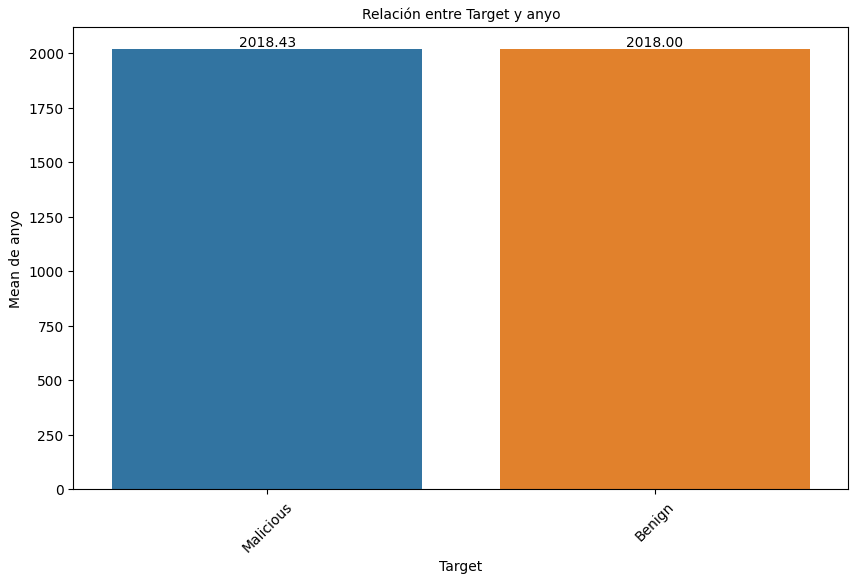

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "mes", show_values=True, measure='mean')

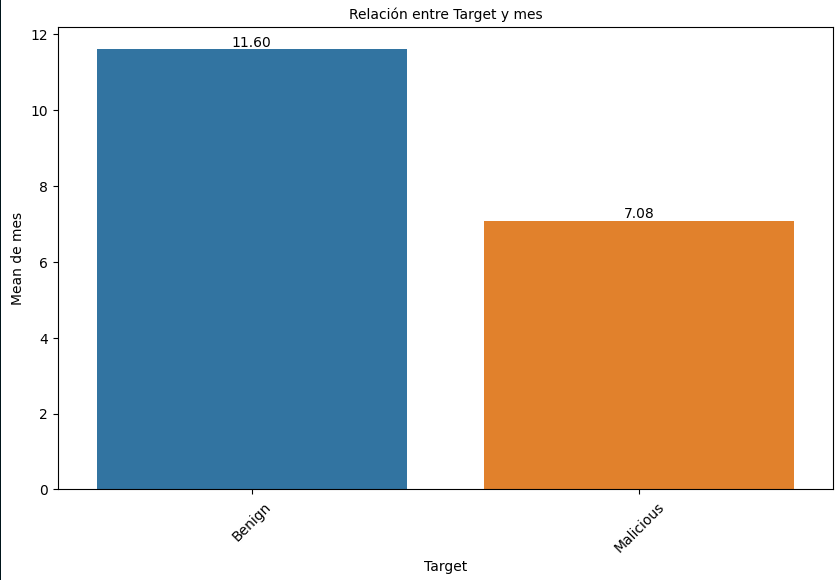

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "dia", show_values=True, measure='mean')

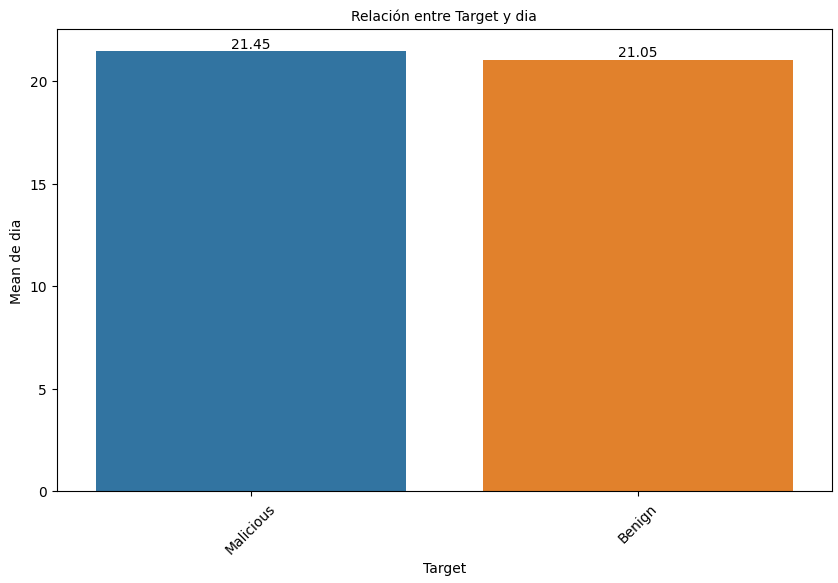

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "hora", show_values=True, measure='mean')

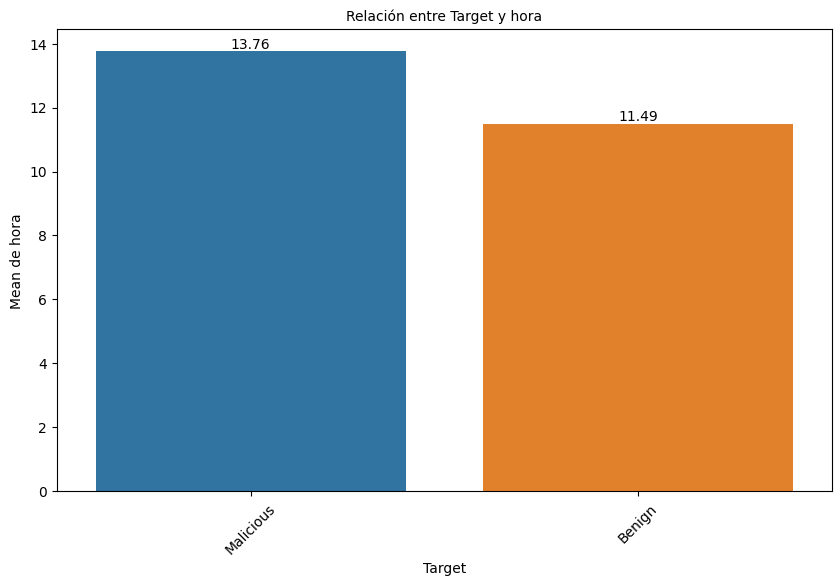

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "dia_semanal", show_values=True, measure='mean')

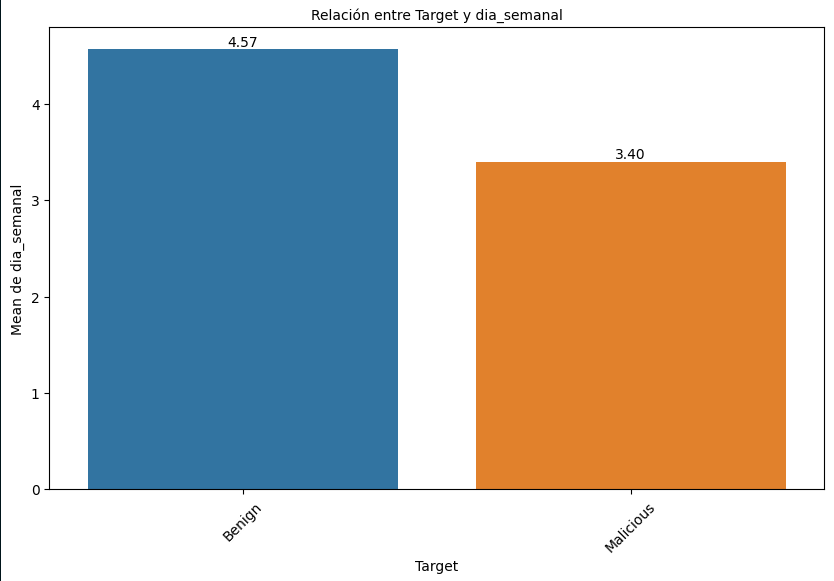

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "orig_ip_bytes", show_values=True, measure='mean')

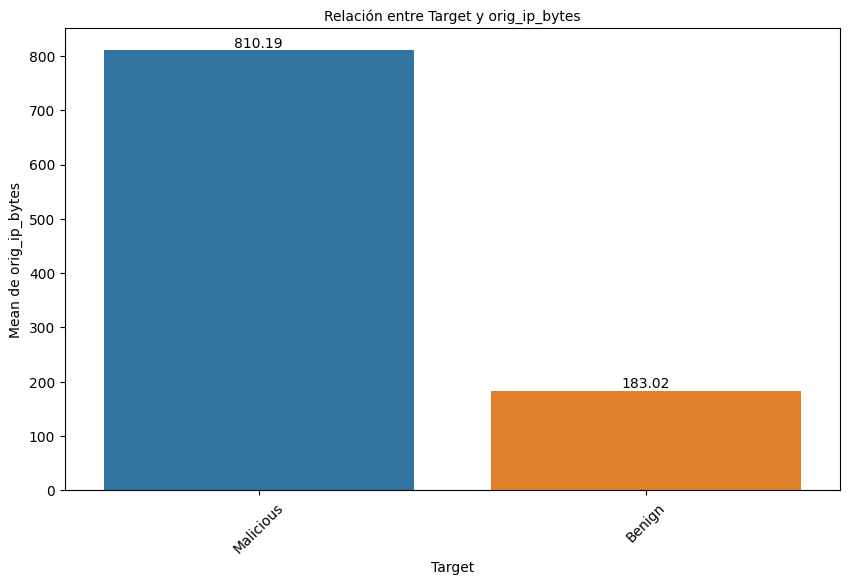

In [ ]:
bt.plot_categorical_numerical_relationship(df, "Target", "orig_pkts", show_values=True, measure='mean')

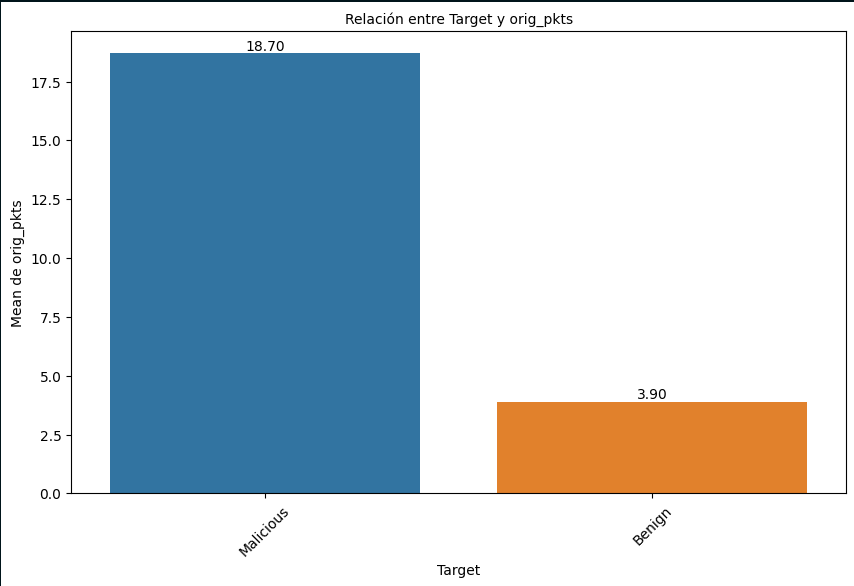

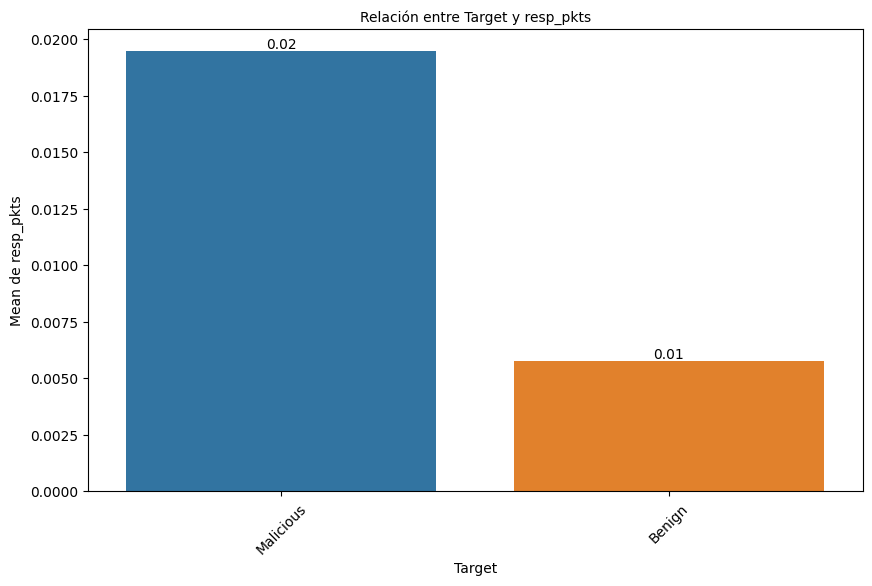

In [35]:
bt.plot_categorical_numerical_relationship(df, "Target", "resp_pkts", show_values=True, measure='mean')


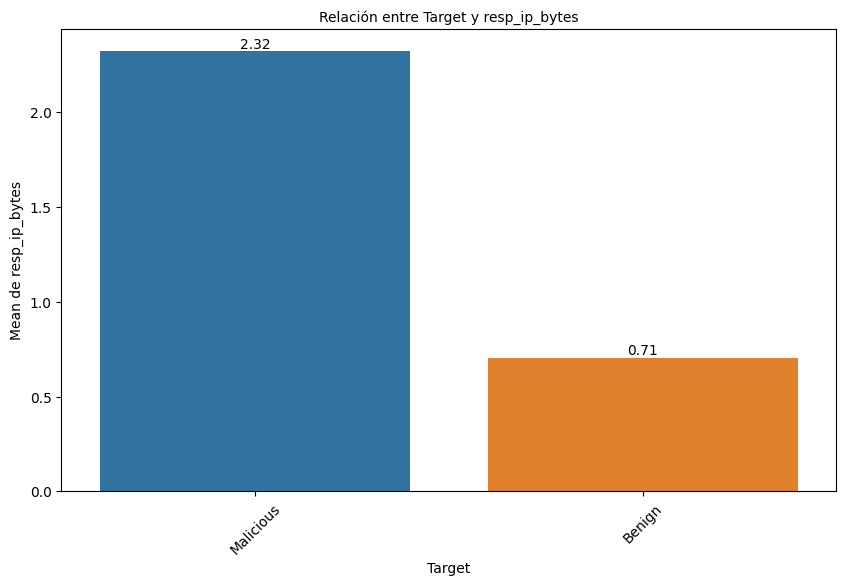

In [36]:
bt.plot_categorical_numerical_relationship(df, "Target", "resp_ip_bytes", show_values=True, measure='mean')

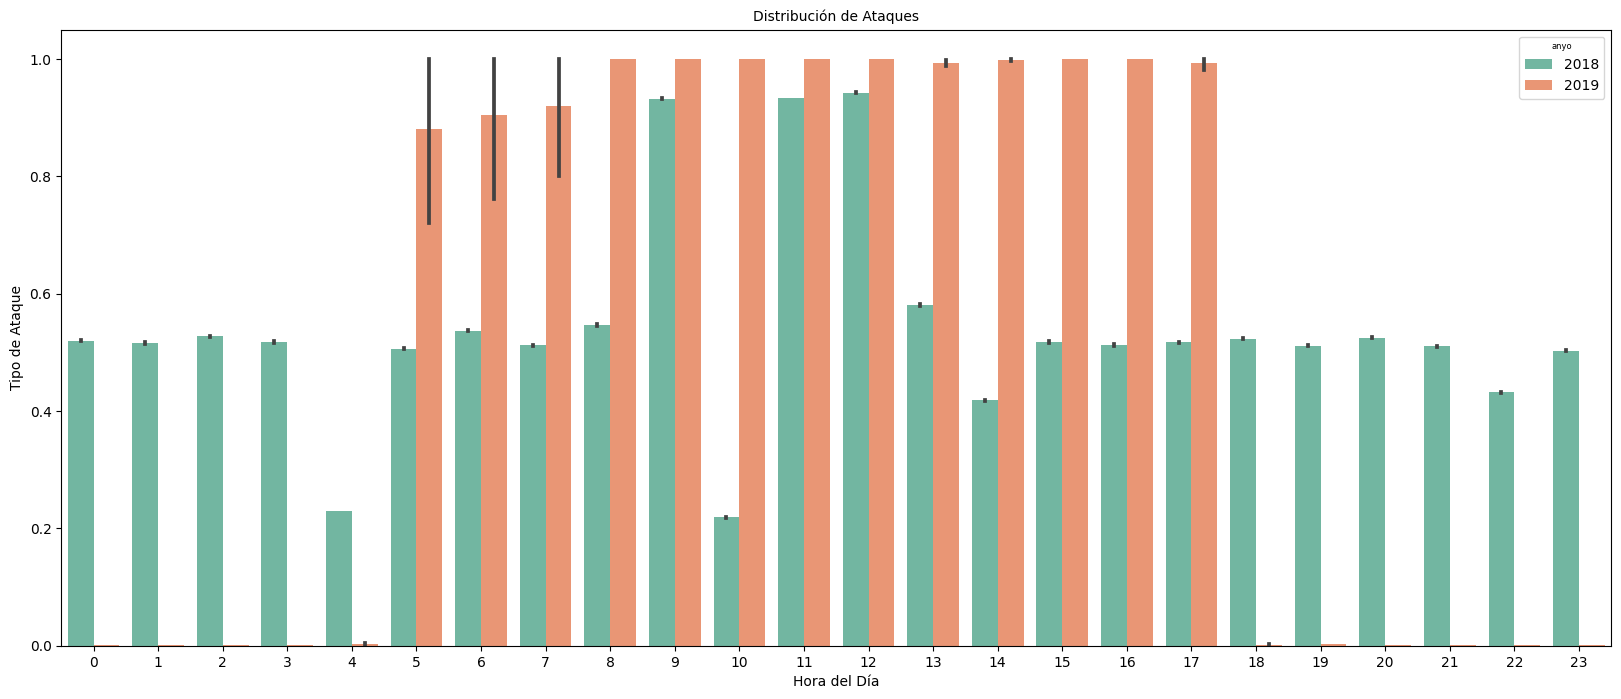

In [11]:

#Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(20, 8))
sns.barplot(x='hora', y='Target', hue='anyo', data=df_p, palette='Set2')
plt.title('Distribución de Ataques')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend=False
plt.show()

In [41]:
#MAPEO LA TARGET
MAPPING={"Malicious": 0, "Benign": 1}

df_nulos["Target"].replace(MAPPING, inplace=True)

In [43]:
df_nulos.shape

(25011003, 16)

In [45]:
df_nulos.to_csv(r"/home/vicevil/Documentos/df_malware_unido_solo_cat_y_escalar.csv", index=False)

CONTINUA EN NOTEBOOK MALWARE_1_2

In [102]:
df.to_csv(r"/home/vicevil/Documentos/df_malware_col_importance_label_mix_round.csv", index=False)

In [6]:
df=pd.read_csv(r"/home/vicevil/Documentos/df_malware_col_importance_label_mix_round.csv")

In [38]:
#LINUX
df.to_csv(r"/media/vicevil/Nuevo vol/Cursos/REPOSITORIOS/DATASET/malware_total/original/df_malware_TOTAL_minmax_round.csv")

In [101]:
df.head()

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,51524.0,9752626,23.0,1,6,0.0,3.0,180.0,0.0,0.0,2018,5,9,15,2,0
1,56305.0,9664603,23.0,1,6,0.0,1.0,60.0,0.0,0.0,2018,5,9,15,2,0
2,41101.0,732384,23.0,1,6,0.0,1.0,60.0,0.0,0.0,2018,5,9,15,2,0
3,60905.0,1983916,23.0,1,6,0.0,3.0,180.0,0.0,0.0,2018,5,9,15,2,0
4,44301.0,11185695,23.0,1,6,0.0,1.0,60.0,0.0,0.0,2018,5,9,15,2,0


In [137]:
df.to_csv(r"/home/vicevil/Documentos/df_malware_9col_target.csv")

 HACER MIXMAX ESCALER REDONDEANDO A O Y 1 _ APLICADO A  PARA RED NEURONAL

In [ ]:
columnas_numericas = df.drop(["Target"], axis=1).select_dtypes(include=['number'])
#instacio
scaler = MinMaxScaler()

# Escalo datos
col_num_scal = scaler.fit_transform(columnas_numericas)

# rangos que queremos
rango_deseado_min = 0
rango_deseado_max = 1

# Multiplica los datos x los rangos
col_num_scal_rangos= col_num_scal * (rango_deseado_max - rango_deseado_min) + rango_deseado_min

# Redondea los datos escalados rescalados al entero más cercano
col_num_scal_round = pd.DataFrame(col_num_scal_rangos).round().astype(int)

# Concatena los datos rescalados enteros con la columna "Target" y el resto del DataFrame original
df = pd.concat([df["Target"], col_num_scal_round], axis=1)

SPLIT.- DF MINMAX Y SELECCIONADO REDONDEO A 0 Y 1 SEGUN SEA

In [9]:
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22509902, 9)
(22509902,)
(2501101, 9)
(2501101,)


<AxesSubplot:xlabel='Target', ylabel='Count'>

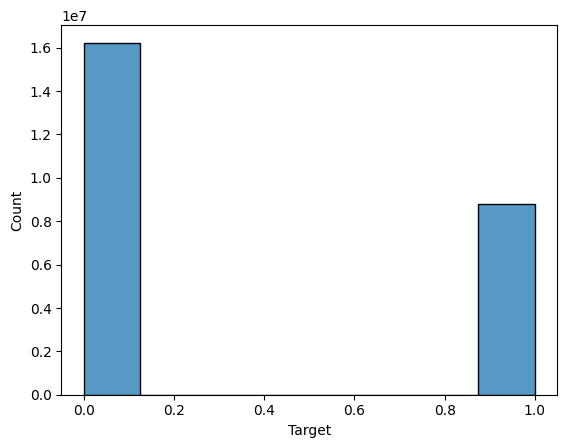

In [20]:
sns.histplot(y, bins=8)

SPLIT DE MALWARE_TOTAL_TARGET_BALANC-- **DESASTRE**

In [5]:
X1= df_temp.drop(["Target"], axis=1).values# un 30% DE DATOS POR IGUALAR LA TARGET
y1=df_temp["Target"].values

In [6]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1, test_size=0.2, random_state=42) 
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

#UN RESULTADO DESASTROSO CON ACCURACY DE 0.5 EN LA EPOCHO 40

(14048252, 18)
(14048252,)
(3512064, 18)
(3512064,)


MUY BIEN MAS DE 0.90 PERO 12 COLUMNAS

In [159]:
df_minmax_scaled.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_1_1_3_minmax.csv", index=False)

In [1]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_1_1_2_proceso.csv.csv")

NameError: name 'pd' is not defined

In [12]:
#linux
df_minmax=pd.read_csv(r"/media/vicevil/Nuevo vol/Cursos/REPOSITORIOS/DATASET/malware_total/original/df_malware_1_1_3_minmax.csv")

In [13]:
df_minmax.head()

,Target,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [5]:
df_array=df_minmax_scaled.values

In [6]:
df_array

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [7]:
X= df_minmax_scaled.iloc[:,1:]
y=df_minmax_scaled.iloc[:,0]

In [167]:
#df_minmax_scaled.iloc[:,1:]
#f_minmax_scaled.iloc[:,0]

In [16]:
#LINUX

import os
os.environ['TENSORBOARD_BINARY'] = '/home/vicevil/miniconda3/pkgs/tensorboard-2.10.0-py37h06a4308_0/lib/python3.7/site-packages/tensorboard'  

#import tensorboard

# Definir el directorio de registro para TensorBoard(ensorBoard es una herramienta esencial para entender, depurar y optimizar los modelos de TensorFlow.)
#log_dir = r"/media/vicevil/Nuevo vol/Cursos/REPOSITORIOS/DATASET/malware_total/logs/fit"

# Configurar TensorBoard
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True, )

In [5]:
df_sca.to_csv(r"/home/vicevil/Documentos/df_malware_16col_label_minmax.csv", index=False)

NameError: name 'df_sca' is not defined

In [5]:
df_sca=pd.read_csv(r"/home/vicevil/Documentos/df_malware_16col_label_minmax.csv",)

In [6]:
df_sca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.786206,0.836806,0.000351,0.5,0.500000,0.0,4.543571e-08,9.400493e-08,0.000000,0.000000,0.0,0.363636,0.266667,0.652174,0.333333,0.0
1,0.859159,0.829254,0.000351,0.5,0.500000,0.0,1.514524e-08,3.133498e-08,0.000000,0.000000,0.0,0.363636,0.266667,0.652174,0.333333,0.0
2,0.627161,0.062841,0.000351,0.5,0.500000,0.0,1.514524e-08,3.133498e-08,0.000000,0.000000,0.0,0.363636,0.266667,0.652174,0.333333,0.0
3,0.929351,0.170226,0.000351,0.5,0.500000,0.0,4.543571e-08,9.400493e-08,0.000000,0.000000,0.0,0.363636,0.266667,0.652174,0.333333,0.0
4,0.675990,0.959768,0.000351,0.5,0.500000,0.0,1.514524e-08,3.133498e-08,0.000000,0.000000,0.0,0.363636,0.266667,0.652174,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,0.001877,0.946989,0.001877,1.0,0.833333,0.0,3.029048e-08,7.938194e-08,0.000208,0.000292,1.0,0.727273,0.666667,0.000000,0.833333,1.0
25010999,0.569253,0.014160,0.271138,0.5,0.583333,0.0,1.355802e-04,2.525609e-04,1.000000,1.000000,1.0,0.727273,0.633333,0.043478,0.666667,0.0
25011000,0.001877,0.626815,0.001877,1.0,0.833333,0.0,3.029048e-08,7.938194e-08,0.000208,0.000292,1.0,0.727273,0.666667,0.000000,0.833333,1.0
25011001,0.001877,0.779650,0.001877,1.0,0.833333,0.0,3.029048e-08,7.938194e-08,0.000208,0.000292,1.0,0.727273,0.666667,0.000000,0.833333,1.0


In [7]:
X= df_sca.iloc[:,0:15]
y=df_sca.iloc[:, 15]


In [9]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17507702, 15)
(17507702,)
(7503301, 15)
(7503301,)


In [13]:
# Definir la función de activación Swish
def swish(x):
  return x * tf.math.sigmoid(x)

# Definir la función de activación Mish
def mish(x):
  return x * tf.math.tanh(tf.math.log1p(tf.math.exp(-x)))


MODELO CON SGD, 0.3 PARA TEST, ALTERNANDO ELU Y RELU, VALADACION SPLIT 0.1

In [10]:
#modelo
modelo = tf.keras.Sequential()
# Capa de entrada
modelo.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(15,), kernel_regularizer=l2(0.1)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=156, activation="relu", input_dim=15))
modelo.add(Dropout(0.4))
modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(tf.keras.layers.Dense(units=64, activation='relu')) 
  
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad

"""optimizador=Adam( learning_rate=0.0001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.5, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.5, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True,
                                                  monitor="val_loss")

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1, validation_split=0.1)


2024-03-26 10:23:47.260902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 10:23:47.261208: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-03-26 10:23:47.261341: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 10:23:47.261452: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwid

Epoch 1/20


2024-03-26 10:23:52.414853: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


30776/30776 [==============================] - 44s 1ms/step - loss: 0.4968 - accuracy: 0.7822 - val_loss: 0.6491 - val_accuracy: 0.6490
Epoch 2/20
30776/30776 [==============================] - 43s 1ms/step - loss: 0.6486 - accuracy: 0.6493 - val_loss: 0.6511 - val_accuracy: 0.6490
Epoch 3/20
30776/30776 [==============================] - 42s 1ms/step - loss: 0.6485 - accuracy: 0.6490 - val_loss: 0.6484 - val_accuracy: 0.6490
Epoch 4/20
30776/30776 [==============================] - 42s 1ms/step - loss: 0.6485 - accuracy: 0.6488 - val_loss: 0.6484 - val_accuracy: 0.6490
Epoch 5/20
30776/30776 [==============================] - 42s 1ms/step - loss: 0.6482 - accuracy: 0.6489 - val_loss: 0.6482 - val_accuracy: 0.6490
Epoch 6/20
30776/30776 [==============================] - 42s 1ms/step - loss: 0.6481 - accuracy: 0.6490 - val_loss: 0.6481 - val_accuracy: 0.6490
Epoch 7/20
30776/30776 [==============================] - 42s 1ms/step - loss: 0.6481 - accuracy: 0.6490 - val_loss: 0.6482 - val

In [11]:
modelo.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               8192      
_________________________________________________________________
dense_1 (Dense)              (None, 156)               80028     
_________________________________________________________________
dropout (Dropout)            (None, 156)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               20096     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 116,702
Trainable params: 116,702
Non-trainable params: 0
__________________________________________________

EVALUACION DEL MODELO CON TEST

In [12]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

234479/234479 [==============================] - 180s 766us/step - loss: 0.6481 - accuracy: 0.6488
Loss: 0.6481092572212219
Accuracy: 0.6488481760025024


/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79   4868503
         1.0       0.00      0.00      0.00   2634798

    accuracy                           0.65   7503301
   macro avg       0.32      0.50      0.39   7503301
weighted avg       0.42      0.65      0.51   7503301



/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


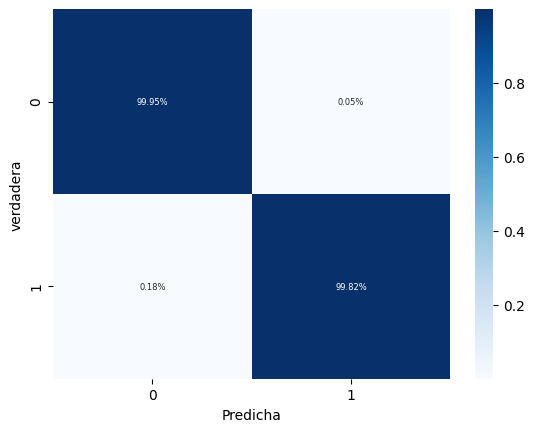

In [13]:
cm=confusion_matrix(y_test, y_pred_classes)
cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
fig, ax =plt.subplots()
sns.heatmap(cm_norm, annot=True,fmt=".2%", cmap="Blues", ax=ax)
ax.set_xlabel("Predicha")
ax.set_ylabel("verdadera")
plt.show()



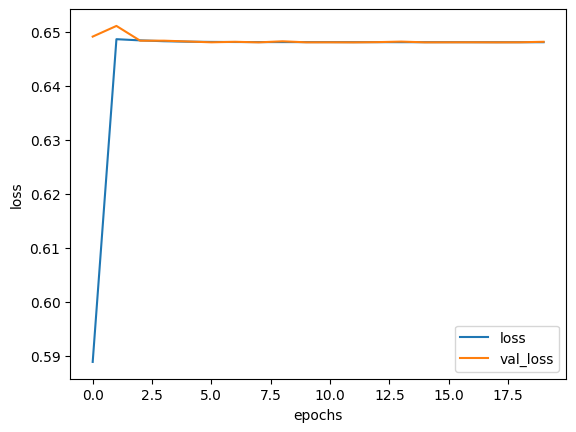

In [13]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");


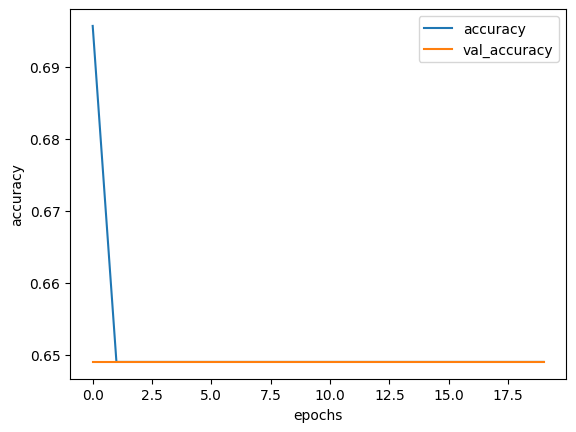

In [14]:
df_history = pd.DataFrame(historia.history)
df_history[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");


In [15]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20008802, 15)
(20008802,)
(5002201, 15)
(5002201,)


MODELO CON OPTIMIDAZOR ADAM, TODO ELU, VALIDATION SPLIT 0.2 Y EN SPLI= 0.2 DE RESERVA PARA TEST

In [16]:
#modelo
modelo = tf.keras.Sequential()
# Capa de entrada
modelo.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(15,), kernel_regularizer=l2(0.1)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=156, activation="elu", input_dim=15))
modelo.add(Dropout(0.4))
modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(tf.keras.layers.Dense(units=64, activation='elu')) 
  
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.0001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.5, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.5, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True,
                                                  monitor="accuracy")

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
31264/31264 [==============================] - 52s 2ms/step - loss: 0.2730 - accuracy: 0.9884 - val_loss: 0.0199 - val_accuracy: 0.9973
Epoch 2/20
31264/31264 [==============================] - 52s 2ms/step - loss: 0.0196 - accuracy: 0.9972 - val_loss: 0.0191 - val_accuracy: 0.9968
Epoch 3/20
31264/31264 [==============================] - 50s 2ms/step - loss: 0.0182 - accuracy: 0.9972 - val_loss: 0.0175 - val_accuracy: 0.9973
Epoch 4/20
31264/31264 [==============================] - 52s 2ms/step - loss: 0.0167 - accuracy: 0.9973 - val_loss: 0.0119 - val_accuracy: 0.9976
Epoch 5/20
31264/31264 [==============================] - 52s 2ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 0.0116 - val_accuracy: 0.9978
Epoch 6/20
31264/31264 [==============================] - 51s 2ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.0110 - val_accuracy: 0.9979
Epoch 7/20
31264/31264 [==============================] - 52s 2ms/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0

VALIDACION CON TEST_ SOBREAJUSTE

In [17]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

156319/156319 [==============================] - 119s 758us/step - loss: 0.0092 - accuracy: 0.9976
Loss: 0.009188860654830933
Accuracy: 0.9976266622543335
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3245538
         1.0       1.00      1.00      1.00   1756663

    accuracy                           1.00   5002201
   macro avg       1.00      1.00      1.00   5002201
weighted avg       1.00      1.00      1.00   5002201



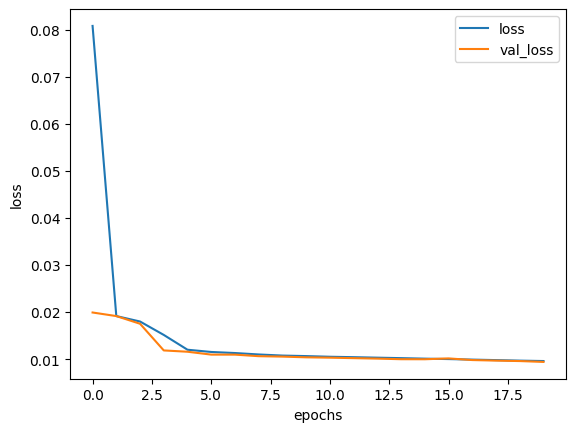

In [18]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

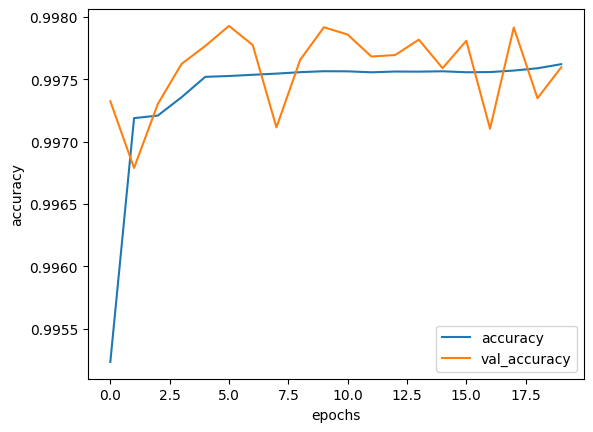

In [19]:
df_history = pd.DataFrame(historia.history)
df_history[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

In [20]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22509902, 15)
(22509902,)
(2501101, 15)
(2501101,)


In [21]:
modelo = tf.keras.Sequential()
# Capa de entrada
modelo.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(15,), kernel_regularizer=l2(1)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=156, activation="elu", input_dim=15))
modelo.add(Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units=64, activation='elu')) 
  
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.0001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.5, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.5, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True,
                                                  monitor="val_accuracy")

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
35172/35172 [==============================] - 61s 2ms/step - loss: 1.7057 - accuracy: 0.9893 - val_loss: 0.0314 - val_accuracy: 0.9955
Epoch 2/10
35172/35172 [==============================] - 58s 2ms/step - loss: 0.0247 - accuracy: 0.9963 - val_loss: 0.0197 - val_accuracy: 0.9969
Epoch 3/10
35172/35172 [==============================] - 57s 2ms/step - loss: 0.0195 - accuracy: 0.9968 - val_loss: 0.0185 - val_accuracy: 0.9970
Epoch 4/10
35172/35172 [==============================] - 56s 2ms/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 0.0183 - val_accuracy: 0.9968
Epoch 5/10
35172/35172 [==============================] - 57s 2ms/step - loss: 0.0183 - accuracy: 0.9969 - val_loss: 0.0176 - val_accuracy: 0.9972
Epoch 6/10
35172/35172 [==============================] - 56s 2ms/step - loss: 0.0179 - accuracy: 0.9970 - val_loss: 0.0185 - val_accuracy: 0.9965
Epoch 7/10
35172/35172 [==============================] - 56s 2ms/step - loss: 0.0164 - accuracy: 0.9971 - val_loss: 0

In [22]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

78160/78160 [==============================] - 60s 767us/step - loss: 0.0114 - accuracy: 0.9974
Loss: 0.011389514431357384
Accuracy: 0.9974459409713745
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1622554
         1.0       1.00      0.99      1.00    878547

    accuracy                           1.00   2501101
   macro avg       1.00      1.00      1.00   2501101
weighted avg       1.00      1.00      1.00   2501101



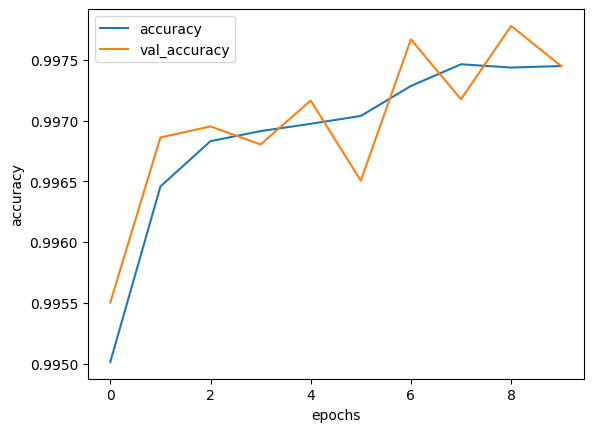

In [23]:
df_history = pd.DataFrame(historia.history)
df_history[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

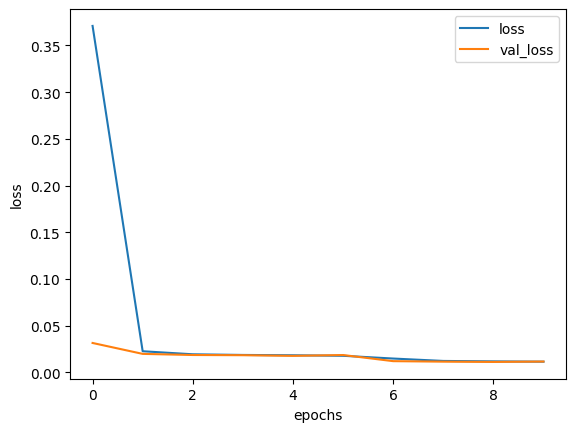

In [24]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

In [25]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20008802, 15)
(20008802,)
(5002201, 15)
(5002201,)


AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'dispatch'

In [41]:
modelo = tf.keras.Sequential()
# Definir las 4 entradas
input_1 = tf.keras.Input(shape=(4,))
modelo.add(tf.keras.layers.Dense(units=64, activation="elu", name='input_1'))
input_2 = tf.keras.Input(shape=(5,))
modelo.add(tf.keras.layers.Dense(units=64, activation="elu", name='input_2'))
input_3 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=64, activation="elu", name='input_3'))
input_4 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=64, activation="elu", name='input_4'))
#concatenacion
combined = tf.keras.layers.Concatenate()([input_1, input_2, input_3, input_4])      
modelo.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(None, 15), kernel_regularizer=l2(1)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=156, activation="elu", input_dim=15))
modelo.add(Dropout(0.4))
modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(tf.keras.layers.Dense(units=64, activation='elu')) 
  
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

"""optimizador=Adam( learning_rate=0.0001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.5, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.5, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""
optimizador = tf.keras.optimizers.Ftrl(
    l1_regularization_strength=0.0001,#penaliza los pesos con lasso
    l2_regularization_strength=0.000001,#penaliza con ridge, consiguiendo con ambos un proceso de actualziacion de pesosmejorado, evitando sobreajuste
    learning_rate_power=-0.5,#contola la rapidez de la tasa de aprendizaje con la que decae con el tiempo, indiviualemnte a cada parametro
    initial_accumulator_value=0.1,#valor inicial de acumulacion de gradientes
)

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True,
                                                  monitor="accuracy")

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
31264/31264 [==============================] - 70s 2ms/step - loss: 0.7295 - accuracy: 0.6490 - val_loss: 0.6480 - val_accuracy: 0.6490
Epoch 2/10
31264/31264 [==============================] - 71s 2ms/step - loss: 0.6482 - accuracy: 0.6489 - val_loss: 0.6480 - val_accuracy: 0.6490
Epoch 3/10
31264/31264 [==============================] - 71s 2ms/step - loss: 0.6481 - accuracy: 0.6489 - val_loss: 0.6480 - val_accuracy: 0.6490
Epoch 4/10
31264/31264 [==============================] - 71s 2ms/step - loss: 0.6481 - accuracy: 0.6489 - val_loss: 0.6480 - val_accuracy: 0.6490
Epoch 5/10
31264/31264 [==============================] - 74s 2ms/step - loss: 0.6481 - accuracy: 0.6490 - val_loss: 0.6480 - val_accuracy: 0.6490
Epoch 6/10
31264/31264 [==============================] - 66s 2ms/step - loss: 0.6482 - accuracy: 0.6487 - val_loss: 0.6480 - val_accuracy: 0.6490
Epoch 7/10
31264/31264 [==============================] - 66s 2ms/step - loss: 0.6482 - accuracy: 0.6488 - val_loss: 0

In [42]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

156319/156319 [==============================] - 136s 868us/step - loss: 0.6482 - accuracy: 0.6488
Loss: 0.6481724977493286
Accuracy: 0.648822009563446


/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79   3245538
         1.0       0.00      0.00      0.00   1756663

    accuracy                           0.65   5002201
   macro avg       0.32      0.50      0.39   5002201
weighted avg       0.42      0.65      0.51   5002201



/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


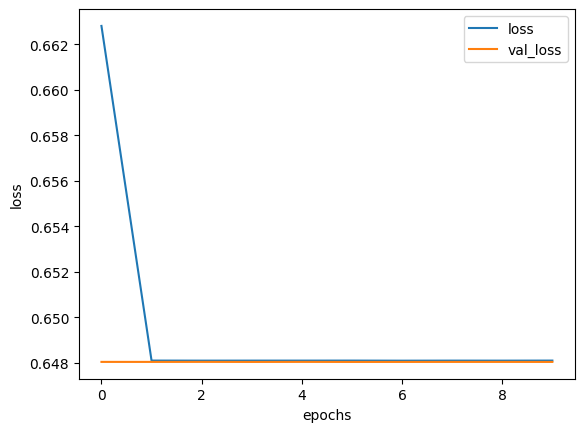

In [43]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

In [44]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20008802, 15)
(20008802,)
(5002201, 15)
(5002201,)


In [69]:
modelo = tf.keras.Sequential()
# Definir las 4 entradas
input_1 = tf.keras.Input(shape=(4,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_1'))
input_2 = tf.keras.Input(shape=(5,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_2'))
input_3 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_3'))
input_4 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_4'))
#concatenacion
combined = tf.keras.layers.Concatenate()([input_1, input_2, input_3, input_4])      
modelo.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(None, 15), kernel_regularizer=l2(1)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=156, activation="relu", input_dim=15))
modelo.add(Dropout(0.4))
modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(tf.keras.layers.Dense(units=64, activation='elu')) 
  
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.00001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=1, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=1, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""
"""optimizador = tf.keras.optimizers.Ftrl(
    l1_regularization_strength=0.0001,#penaliza los pesos con lasso
    l2_regularization_strength=0.000001,#penaliza con ridge, consiguiendo con ambos un proceso de actualziacion de pesosmejorado, evitando sobreajuste
    learning_rate_power=-0.5,#contola la rapidez de la tasa de aprendizaje con la que decae con el tiempo, indiviualemnte a cada parametro
    initial_accumulator_value=0.1,#valor inicial de acumulacion de gradientes
)"""

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True,
                                                  monitor="accuracy",
                                                  mode="max")

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
31264/31264 [==============================] - 65s 2ms/step - loss: nan - accuracy: 0.6489 - val_loss: nan - val_accuracy: 0.6490
Epoch 2/10
31264/31264 [==============================] - 63s 2ms/step - loss: nan - accuracy: 0.6488 - val_loss: nan - val_accuracy: 0.6490
Epoch 3/10
31264/31264 [==============================] - 64s 2ms/step - loss: nan - accuracy: 0.6487 - val_loss: nan - val_accuracy: 0.6490
Epoch 4/10
31264/31264 [==============================] - 64s 2ms/step - loss: nan - accuracy: 0.6490 - val_loss: nan - val_accuracy: 0.6490
Epoch 5/10
31264/31264 [==============================] - 64s 2ms/step - loss: nan - accuracy: 0.6487 - val_loss: nan - val_accuracy: 0.6490
Epoch 6/10
31264/31264 [==============================] - 64s 2ms/step - loss: nan - accuracy: 0.6491 - val_loss: nan - val_accuracy: 0.6490
Epoch 7/10
31264/31264 [==============================] - 65s 2ms/step - loss: nan - accuracy: 0.6490 - val_loss: nan - val_accuracy: 0.6490
Epoch 8/10
31

In [70]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.2)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

156319/156319 [==============================] - 130s 831us/step - loss: nan - accuracy: 0.6488
Loss: nan
Accuracy: 0.648822009563446


/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79   3245538
         1.0       0.00      0.00      0.00   1756663

    accuracy                           0.65   5002201
   macro avg       0.32      0.50      0.39   5002201
weighted avg       0.42      0.65      0.51   5002201



/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


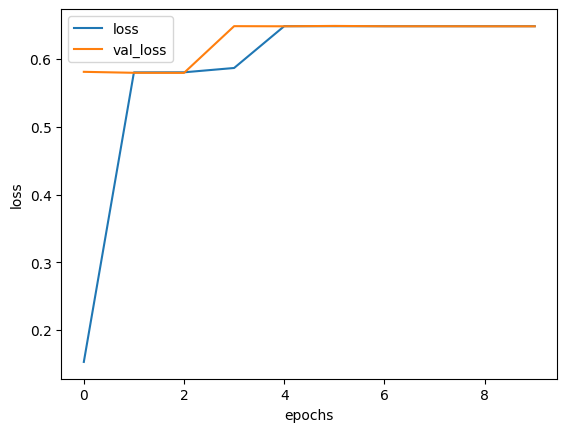

In [49]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

PROBAMOS CON MENOS CARACTERISTICAS Y SON LAS IMPORTANTES EXTRAIDAS DEL RF MAS LA TARGET

In [4]:
df=pd.read_csv(r"/home/vicevil/Documentos/df_malware_col_importance_label_mix_round.csv")

In [5]:
df.head()

,Target,0,1,2,3,4,5,6,7,8,9
0,0,1,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,1,0


In [6]:
X= df.iloc[:,0:9]
y=df.iloc[:, 9]


In [7]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22509902, 9)
(22509902,)
(2501101, 9)
(2501101,)


In [9]:
modelo = tf.keras.Sequential()
# Definir las 4 entradas
input_1 = tf.keras.Input(shape=(4,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_1'))
input_2 = tf.keras.Input(shape=(5,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_2'))
input_3 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_3'))
input_4 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=64, activation="relu", name='input_4'))
#concatenacion
combined = tf.keras.layers.Concatenate()([input_1, input_2, input_3, input_4])      
modelo.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(None, 9), kernel_regularizer=l2(0.01)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=156, activation="relu", input_dim=9))
modelo.add(Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(tf.keras.layers.Dense(units=64, activation='elu')) 
  
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.0001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.9, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.9, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""
"""optimizador = tf.keras.optimizers.Ftrl(
    l1_regularization_strength=0.0001,#penaliza los pesos con lasso
    l2_regularization_strength=0.000001,#penaliza con ridge, consiguiendo con ambos un proceso de actualziacion de pesosmejorado, evitando sobreajuste
    learning_rate_power=-0.5,#contola la rapidez de la tasa de aprendizaje con la que decae con el tiempo, indiviualemnte a cada parametro
    initial_accumulator_value=0.1,#valor inicial de acumulacion de gradientes
)"""

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True,
                                                  monitor="accuracy")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1)#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora segun el patiente


# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/20
35172/35172 [==============================] - 69s 2ms/step - loss: 0.5651 - accuracy: 0.6823 - val_loss: 0.4864 - val_accuracy: 0.6851
Epoch 2/20
35172/35172 [==============================] - 71s 2ms/step - loss: 0.4868 - accuracy: 0.6841 - val_loss: 0.4863 - val_accuracy: 0.6849
Epoch 3/20
11995/35172 [=========>....................] - ETA: 41s - loss: 0.4867 - accuracy: 0.6834

X-Content-Type-Options is required to be "nosniff"


12018/35172 [=========>....................] - ETA: 41s - loss: 0.4867 - accuracy: 0.6834

X-Content-Type-Options is required to be "nosniff"
Requires default-src for Content-Security-Policy
X-Content-Type-Options is required to be "nosniff"


12161/35172 [=========>....................] - ETA: 41s - loss: 0.4867 - accuracy: 0.6834

12186/35172 [=========>....................] - ETA: 41s - loss: 0.4867 - accuracy: 0.6834

35172/35172 [==============================] - 68s 2ms/step - loss: 0.4867 - accuracy: 0.6838 - val_loss: 0.4864 - val_accuracy: 0.6849
Epoch 4/20
35172/35172 [==============================] - 67s 2ms/step - loss: 0.4865 - accuracy: 0.6841 - val_loss: 0.4861 - val_accuracy: 0.6852
Epoch 5/20
35172/35172 [==============================] - 72s 2ms/step - loss: 0.4866 - accuracy: 0.6840 - val_loss: 0.4861 - val_accuracy: 0.6849
Epoch 6/20
35172/35172 [==============================] - 68s 2ms/step - loss: 0.4866 - accuracy: 0.6841 - val_loss: 0.4861 - val_accuracy: 0.6850
Epoch 7/20
35172/35172 [==============================] - 68s 2ms/step - loss: 0.4864 - accuracy: 0.6844 - val_loss: 0.4861 - val_accuracy: 0.6852
Epoch 8/20
35172/35172 [==============================] - 74s 2ms/step - loss: 0.4864 - accuracy: 0.6843 - val_loss: 0.4861 - val_accuracy: 0.6852
Epoch 9/20
35172/35172 [==============================] - 74s 2ms/step - loss: 0.4865 - accuracy: 0.6843 - val_loss: 0.4861 - val

In [10]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Dense)              (None, 64)                640       
_________________________________________________________________
input_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
input_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
input_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_6 (Dense)              (None, 156)               80028     
_________________________________________________________________
dropout_1 (Dropout)          (None, 156)              

In [12]:
modelo.save(r"/home/vicevil/Documentos/graficas/logs/fit/modelos")

2024-03-26 22:11:42.130780: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/vicevil/Documentos/graficas/logs/fit/modelos/assets


INFO:tensorflow:Assets written to: /home/vicevil/Documentos/graficas/logs/fit/modelos/assets


In [6]:
#cargo el modelo
tf.keras.models.load_model("modelo.h5")

OSError: SavedModel file does not exist at: modelo.h5/{saved_model.pbtxt|saved_model.pb}

In [13]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

78160/78160 [==============================] - 65s 834us/step - loss: 0.4862 - accuracy: 0.6852
Loss: 0.4862194061279297
Accuracy: 0.6852338314056396
Epoch 1/10
35172/35172 [==============================] - 68s 2ms/step - loss: 0.4864 - accuracy: 0.6849 - val_loss: 0.4860 - val_accuracy: 0.6852
Epoch 2/10
35172/35172 [==============================] - 71s 2ms/step - loss: 0.4864 - accuracy: 0.6849 - val_loss: 0.4860 - val_accuracy: 0.6852
Epoch 3/10
35172/35172 [==============================] - 68s 2ms/step - loss: 0.4864 - accuracy: 0.6849 - val_loss: 0.4860 - val_accuracy: 0.6852
Epoch 4/10
35172/35172 [==============================] - 70s 2ms/step - loss: 0.4864 - accuracy: 0.6849 - val_loss: 0.4860 - val_accuracy: 0.6852
Epoch 5/10
35172/35172 [==============================] - 70s 2ms/step - loss: 0.4864 - accuracy: 0.6849 - val_loss: 0.4860 - val_accuracy: 0.6852
Epoch 6/10
35172/35172 [==============================] - 73s 2ms/step - loss: 0.4864 - accuracy: 0.6849 - val_loss

In [11]:
modelo = tf.keras.Sequential()
# Definir las 4 entradas

input_1 = tf.keras.Input(shape=(1,))
modelo.add(tf.keras.layers.Dense(units=1024, activation="relu", name='input_1'))
           
input_2 = tf.keras.Input(shape=(2,))
modelo.add(tf.keras.layers.Dense(units=1024, activation="elu", name='input_2'))

input_3 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=512, activation="relu", name='input_3'))

input_4 = tf.keras.Input(shape=(3,))
modelo.add(tf.keras.layers.Dense(units=512, activation="elu", name='input_4'))

#concatenacion
combined = tf.keras.layers.Concatenate()([input_1, input_2, input_3, input_4])     
modelo.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(None,9), kernel_regularizer=l2(0.01)))
modelo.add(tf.keras.layers.BatchNormalization())#mejora la tasa de parendizaje, evitando sobreajuste, ya que tb regulariza la funcion

# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=256, activation="relu", input_dim=9))
modelo.add(tf.keras.layers.BatchNormalization())

#modelo.add(Dropout(0.4))

modelo.add(tf.keras.layers.Dense(units=128, activation="elu"))
modelo.add(tf.keras.layers.BatchNormalization())

modelo.add(tf.keras.layers.Dense(units=128, activation='elu'))
modelo.add(tf.keras.layers.BatchNormalization())

# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.0001, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.5, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.5, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-08, #es para prevenior divisiones entre 0
                    amsgrad=True)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""
"""optimizador = tf.keras.optimizers.Ftrl(
    l1_regularization_strength=0.0001,#penaliza los pesos con lasso
    l2_regularization_strength=0.000001,#penaliza con ridge, consiguiendo con ambos un proceso de actualziacion de pesosmejorado, evitando sobreajuste
    learning_rate_power=-0.5,#contola la rapidez de la tasa de aprendizaje con la que decae con el tiempo, indiviualemnte a cada parametro
    initial_accumulator_value=0.1,#valor inicial de acumulacion de gradientes
)"""

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True,
                                                  monitor="accuracy")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=256, epochs=10,validation_split=0.1,callbacks=[reduce_lr])

In [118]:

modelo.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Dense)              (None, 64)                640       
_________________________________________________________________
input_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
input_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
input_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_162 (Dense)            (None, 512)               33280     
_________________________________________________________________
dense_163 (Dense)            (None, 156)               80028     
_________________________________________________________________
dropout_33 (Dropout)         (None, 156)             

In [119]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)





78160/78160 [==============================] - 66s 840us/step - loss: 3.8964e-12 - accuracy: 0.9978
Loss: 3.896413573734048e-12
Accuracy: 0.997780978679657


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [126]:
# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

In [127]:
print(type(y_test)) 
print(type(y_pred_classes))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [144]:
# Métricas de clasificación
print(f"accuracy:", accuracy_score(y_test, y_pred_classes))
print(f"precision:", precision_score(y_test, y_pred_classes))
print(f"recall:",recall_score(y_test, y_pred_classes))
print(f"f1_score:",f1_score(y_test, y_pred_classes))
print(f"support",precision_recall_fscore_support(y_test, y_pred_classes))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [145]:
cm=confusion_matrix(y_test, y_pred_classes)
cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
fig, ax =plt.subplots()
sns.heatmap(cm_norm, annot=True,fmt=".2%", cmap="Blues", ax=ax)
ax.set_xlabel("Predicha")
ax.set_ylabel("verdadera")
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and binary targets

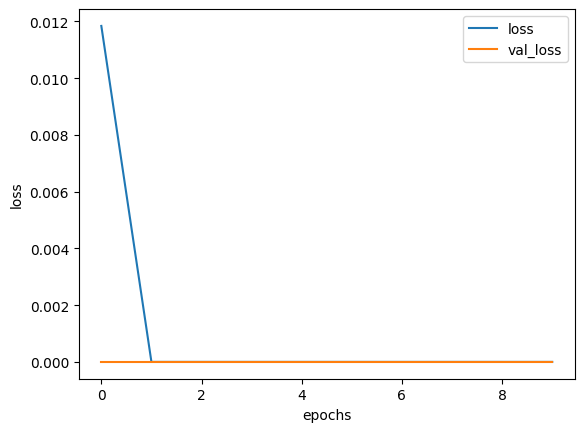

In [146]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

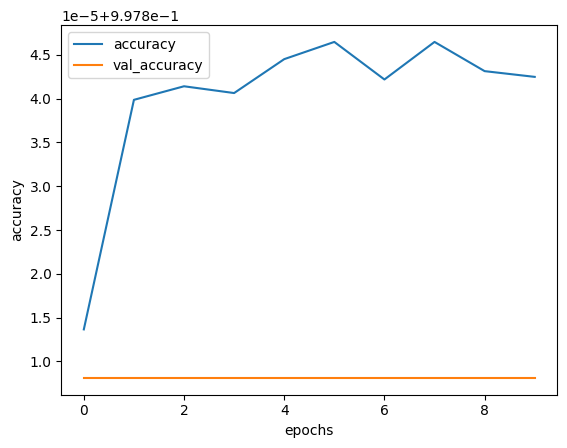

In [147]:
df_history = pd.DataFrame(historia.history)
df_history[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

